In [17]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
from keras.datasets import mnist
(x_train , _), (x_test, _) = mnist.load_data()

In [19]:
# pixel value Normalised 
X_train = x_train.astype('float32') / 255
X_test = x_test.astype('float32') / 255

In [20]:
X_train = X_train.reshape(-1, 28, 28, 1)  # we use conv layer on place of dense layer 
X_test = X_test.reshape(-1, 28, 28, 1)

now add the noise that make input 

In [21]:
noise_factore = 0.5
X_train_noise = X_train + noise_factore*np.random.normal(0.0,1.0, X_train.shape)  
#(mean ,std deviation,dimension)  60k*28*28*1

X_test_noise = X_test + noise_factore*np.random.normal(0.0,1.0, X_test.shape)  

In [22]:
# its not neccesory the value of x in under 0 to 1 so

X_train_noise = np.clip(X_train_noise, 0.0, 1.0)
X_test_noise = np.clip(X_test_noise, 0.0, 1.0)

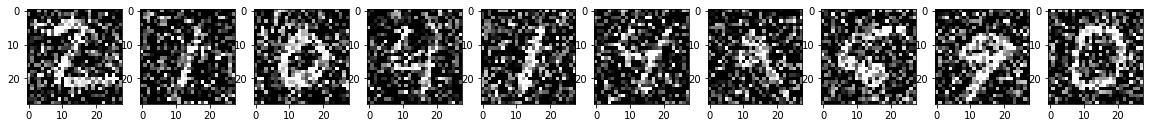

In [23]:
# going to plot first 10 images
n =10
plt.figure(figsize=(20,2))
for i in range(1, n+1):
    sp = plt.subplot(1,n,i)
    plt.imshow(X_test_noise[i].reshape(28, 28))
    plt.gray()
plt.show()

In [25]:
# create model 
from keras.models import Model 
from keras.layers import Input, Conv2D, MaxPool2D, UpSampling2D  #(used opposite way maxpool)
# bed of nails 


In [27]:
input_img = Input(shape=(28, 28, 1))
x = Conv2D(32, (3,3), activation='relu', padding='same')(input_img)
#(26,26,32)  but afeter using padding (28,28,32)

x = MaxPool2D((2,2))(x)
#(14,14,32)

x = Conv2D(32, (3,3),activation='relu', padding='same')(x)
#(14,14,32) bcs padding = same 


encoder = MaxPool2D((2,2))(x)
#(7,7,32)
# waps increase 

x = Conv2D(32 ,(3,3), activation='relu',padding='same')(encoder)
#(7,7,32)
x = UpSampling2D((2,2))(x)
#(14,14,32)
x = Conv2D(32 ,(3,3), activation='relu',padding='same')(x)
#(14,14,32)
x = UpSampling2D((2,2))(x)
#(28,28,32)
decoder = Conv2D(1, (3,3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoder)
autoencoder.compile(optimizer='adadelta',
                   loss='binary_crossentropy')



In [28]:
autoencoder.fit(X_train_noise, X_train,
               validation_data=(X_test_noise, X_test),
               epochs=1,
                batch_size=128,
                shuffle=True
               )

Train on 60000 samples, validate on 10000 samples
Epoch 1/1
60000/60000 [==============================] - 214s 4ms/step - loss: 0.1888 - val_loss: 0.1314


c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if sys.path[0] == '':


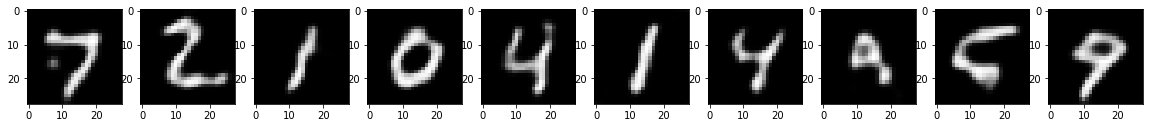

In [33]:
# code to make prediction 
denoised_images = autoencoder.predict(X_test_noise[:10])
n =10
plt.figure(figsize=(20,2))
for i in range(1, n+1):
    
    sp = plt.subplot(1,n,i)
    plt.imshow(X_test_noise[i].reshape(28, 28))
    plt.gray()
  
    
    sp = plt.subplot(1,n,i)
    plt.imshow(denoised_images[i-1].reshape(28, 28))  #bcs i strat form 1
    plt.gray()
plt.show()